# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

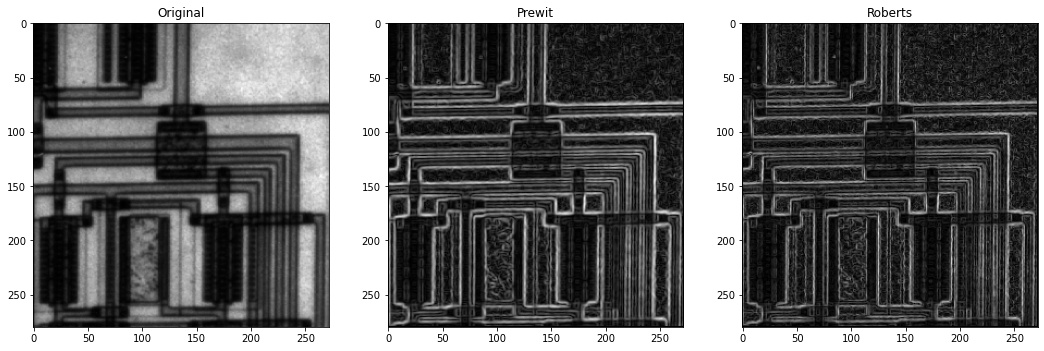

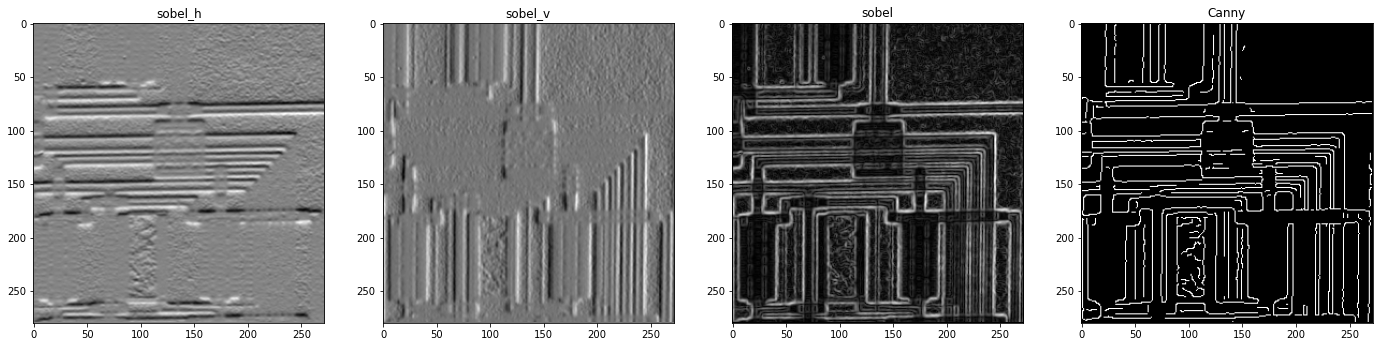

'sigma between 1.2 , 1.5'

In [49]:
# 1. Built-in Sobel, Prewitt, Roberts
img = rgb2gray(io.imread('circuit.tif'))
img1 = prewitt(img) # 8 direction which is time consuming
img2 = roberts(img) # High sensitivity to noise ==> very few pixels ==> Better for Binary
img3 = sobel_h(img)
img4 = sobel_v(img)
img5 = sobel(img)
img6 = canny(img,sigma = 1.4, low_threshold=40, high_threshold=50) # Why this sigma?
show_images([img, img1, img2], ['Original', 'Prewit', 'Roberts'])
show_images([img3, img4, img5, img6], ['sobel_h', 'sobel_v', 'sobel', 'Canny'])
'''sigma between 1.2 , 1.5'''

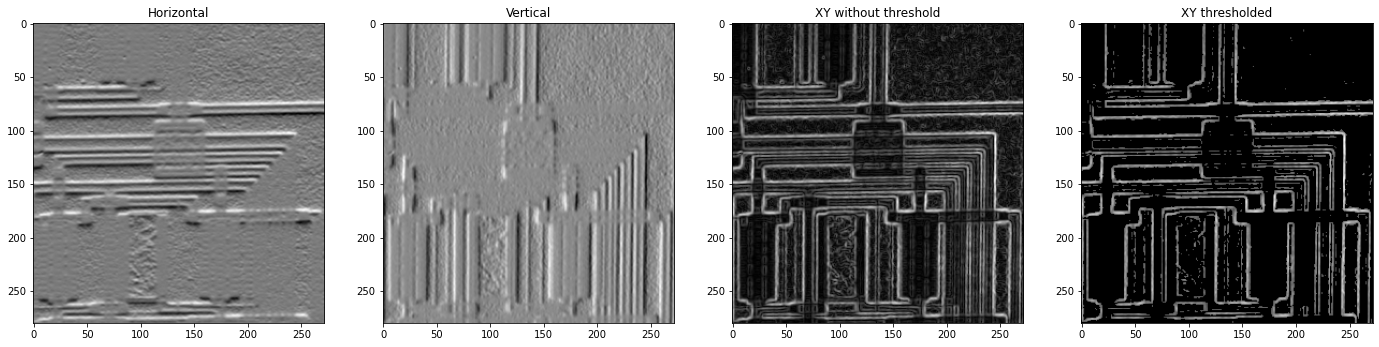

'\nThere is a lot of noise in the image before thrsholding.\nChoosing the value of the threshold is very tricky.\nIf you choosed a low threshold ==> noisy\nHigh threshold ==> affects the fine details\n'

In [50]:
# 2. Custom Sobel (V-H-Both)
def custom_sobel(img, threshold):
    gray = rgb2gray(img).astype(np.uint8)
    sobel_y = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    sobel_x = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

    filter_y = convolve2d(gray, sobel_y, mode='same', boundary='symm', fillvalue=0)
    filter_x = convolve2d(gray, sobel_x, mode='same', boundary='symm', fillvalue=0)
    filter_xy = np.sqrt(np.square(filter_x)+np.square(filter_y))

    threshold_xy = np.where(filter_xy < threshold, 0, filter_xy)
    # threshold_xy = np.copy(filter_xy)
    # for i in range(threshold_xy.shape[0]):
    #     for j in range(threshold_xy.shape[1]):
    #         if(threshold_xy[i][j] < threshold):
    #             threshold_xy[i][j] = 0
            # else:
            #     threshold_xy[i][j] = 255
    

    show_images([filter_x, filter_y, filter_xy, threshold_xy], ['Horizontal', 'Vertical', 'XY without threshold', 'XY thresholded'])

img = io.imread('circuit.tif')
custom_sobel(img, 100)

'''
There is a lot of noise in the image before thrsholding.
Choosing the value of the threshold is very tricky.
If you choosed a low threshold ==> noisy
High threshold ==> affects the fine details
'''

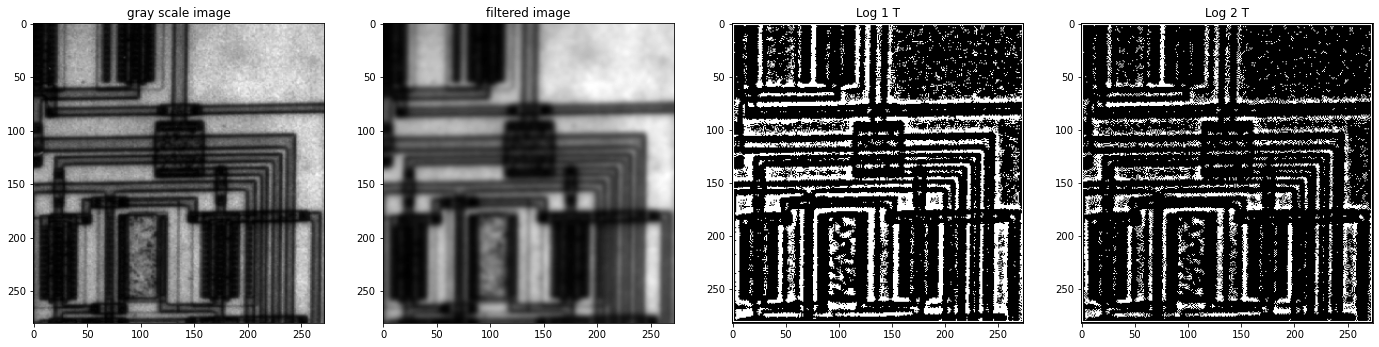

'very sensitive to noise'

In [72]:
# 3. Custom LoG
thresh= 20
img = rgb2gray(io.imread('circuit.tif'))
filtered = gaussian_filter(img,sigma=2)
F1 = np.array([[ -1,-1,-1] ,
                [-1,8,-1 ],
                [-1,-1,-1 ]])
F2 = np.array([[ 0,-1,0] ,
                [-1,4,-1 ],
                [0,-1,0 ]]) 
Log1 = (convolve2d(filtered,F1))
Log2 = (convolve2d(filtered,F2))
Log1T = np.where(Log1 < 5 , 0,1)
Log2T = np.where(Log2 < 3 , 0,1)
show_images([img,filtered,Log1T,Log2T],['gray scale image','filtered image','Log 1 T','Log 2 T'])
'''very sensitive to noise'''


In [ ]:
'''
Optional
1-Make edge detection

2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
img = rgb2gray(io.imread('circuit.tif'))
edges = canny(img,sigma = 1.4, low_threshold=40, high_threshold=50)
edges = edges*0.5
res = img - edges
show_images([img, edges, res], ['Origi'])
